In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import tensorflow as tf
print(tf.__version__)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
df.head()

In [ ]:
X = df.iloc[:,3:13]
y = df.iloc[:,13]

In [ ]:
X.head()

In [ ]:
y.head()

In [42]:
#feature engineering
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
geography= le.fit_transform(X['Geography'])
gender = le.fit_transform(X['Gender'])

KeyError: 'Geography'

In [ ]:
X = pd.concat([X,pd.Series(geography,name='geography'),pd.Series(gender,name='gender')],axis=1)

In [ ]:
X.head()

In [ ]:

X.head()

In [ ]:
X.head()

In [ ]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_test.shape

In [ ]:
X_train.shape

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, PReLU, ELU
from tensorflow.keras.activations import relu, sigmoid, leaky_relu # Import activations properly

In [ ]:
classifier = Sequential()

In [ ]:
classifier.add(Dense(64,activation='relu'))

In [ ]:
classifier.add(Dense(32,activation='relu'))

In [ ]:
classifier.add(Dense(10,activation='relu'))

In [ ]:
classifier.add(Dense(1,activation='sigmoid'))

In [ ]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [41]:
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7811 - loss: nan - val_accuracy: 0.8005 - val_loss: nan
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7909 - loss: nan - val_accuracy: 0.8005 - val_loss: nan
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7872 - loss: nan - val_accuracy: 0.8005 - val_loss: nan
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7898 - loss: nan - val_accuracy: 0.8005 - val_loss: nan
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7917 - loss: nan - val_accuracy: 0.8005 - val_loss: nan
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7858 - loss: nan - val_accuracy: 0.8005 - val_loss: nan
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7847 - loss: nan - val_accuracy: 0.8005 - val_loss: nan
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7835 - loss: nan - val_accuracy: 0.8005 - val_loss: nan
Epoch 9/100
536/

In [43]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

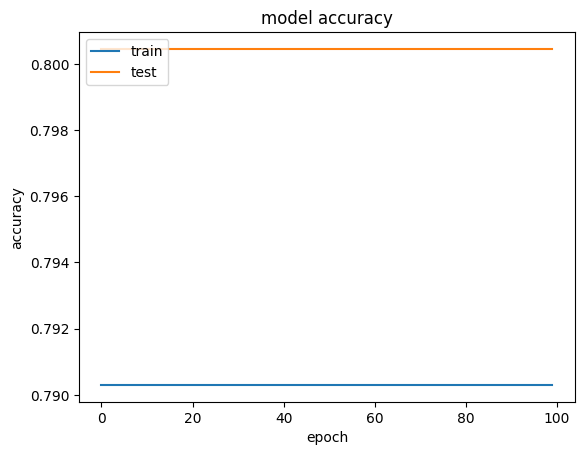

In [44]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

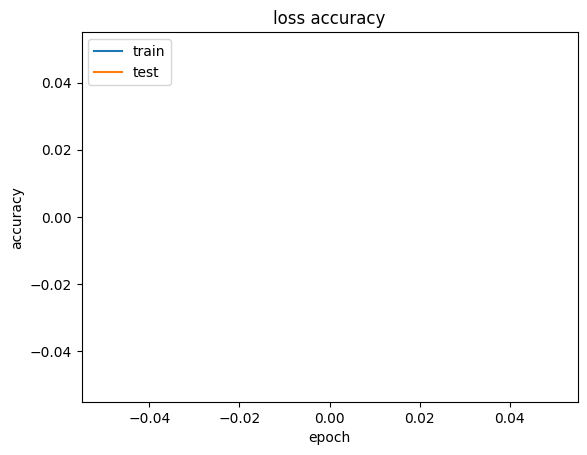

In [45]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('loss accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')